<a href="https://colab.research.google.com/github/DieJacquesDie/machine_learning/blob/master/%5CTP2%5CTP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics
from sklearn.decomposition import PCA



In [109]:

[X, y, name]=np.load("TP1.npy",allow_pickle=True )
xTrain,xTest,yTrain,yTest=train_test_split(X,y,test_size=0.25,random_state=42)
print(len(xTrain))
print(len(xTest))

xTrain=np.reshape(xTrain,(xTrain.shape[0],xTrain.shape[1]*xTrain.shape[2]))
print(np.shape(xTrain))
xTest=np.reshape(xTest,(xTest.shape[0],xTest.shape[1]*xTest.shape[2]))
print(np.shape(xTest))

ScalerTest=preprocessing.StandardScaler()
ScalerTest.fit(xTest)
X_scaled_train = preprocessing.StandardScaler().fit_transform(xTrain)
X_scaled_test=preprocessing.StandardScaler().fit_transform(xTest)


966
322
(966, 2914)
(322, 2914)


**USING PCA**

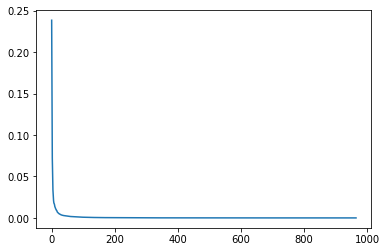

In [94]:
pca=PCA() #966 composantes
pc = pca.fit_transform(X_scaled_train)
plt.plot(pca.explained_variance_ratio_)

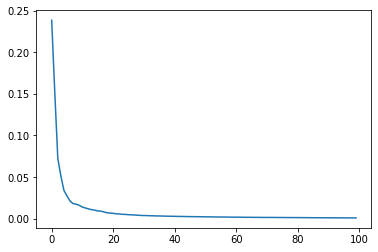

In [95]:
pca100=PCA(n_components=100)
pc100 = pca100.fit_transform(X_scaled_train)
plt.plot(pca100.explained_variance_ratio_) #donne la variance des composantes en les classant par ratio

**classification** avec distance euclidienne

In [96]:
def variationkppv2(n):
  classifier=neighbors.KNeighborsClassifier(n_neighbors=n,p=1)
  classifier.fit(X_scaled_train,yTrain) 
  yPred=classifier.predict(X_scaled_test)
  C2=metrics.confusion_matrix(yTest,yPred)
  return np.sum(np.diag(C2))/np.sum(C2)*100

def variationkppv2PCA(n):
  pca100=PCA(n_components=100)
  xpcatrain = pca100.fit_transform(X_scaled_train)
  xpcatest=pca100.transform(X_scaled_test) #PAS DE FIT !

  classifier2=neighbors.KNeighborsClassifier(n_neighbors=n,p=1)
  classifier2.fit(xpcatrain,yTrain) 
  yPred=classifier2.predict(xpcatest)
  C2=metrics.confusion_matrix( yTest, yPred)
  return np.sum(np.diag(C2))/np.sum(C2)*100

a=variationkppv2(5)
b=variationkppv2PCA(5)
print(a)
print(b)

67.08074534161491
72.98136645962732


Analyse en composantes principales et reconstruction

In [0]:
pca50=PCA(n_components=50) 
xpca50train = pca50.fit_transform(X_scaled_train)
xpca50test =pca50.transform(X_scaled_test)
eigenvectors=pca50.components_

eigenvectors=np.reshape(eigenvectors,(50,62,47))



In [0]:
def plot_gallery(images):
  plt.figure(figsize=(7.2,7.2))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
  plt.show()



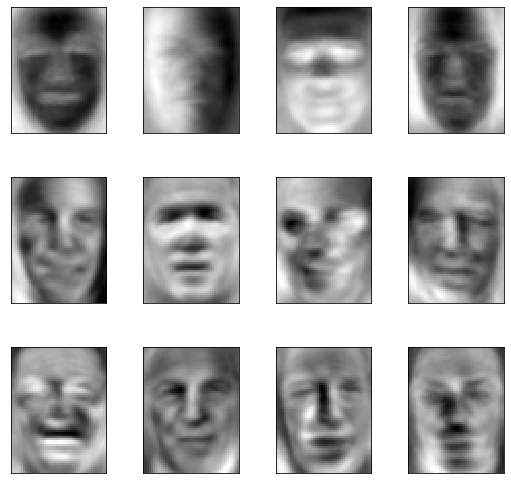

In [106]:


plot_gallery(eigenvectors)




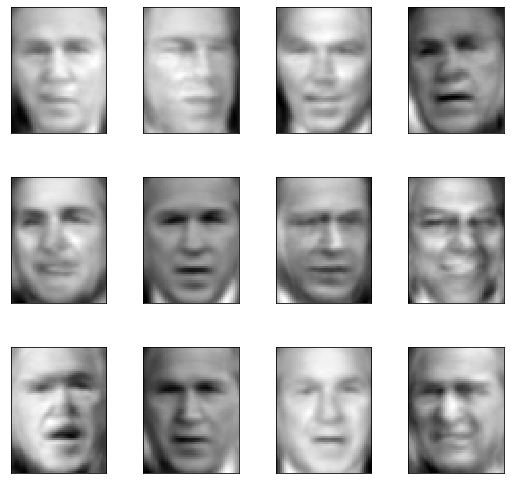

In [113]:
reduc=pca50.transform(X_scaled_test)
original=pca50.inverse_transform(reduc)
original=ScalerTest.inverse_transform(original)
original=np.reshape(original,(322,62,47))
plot_gallery(original)